# Tokenization & Stemming
## Prathamesh Patil
### 09/08/2022

#### Task 1: Load the dataset 
- Load the training and testing dataset (csv files).
- List down the number of instances in each set.
- Combine the training and testing data sets into a single dataset.
- List down the columns in the combined dataset along with their data types, and the total number of instances.

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Read train corpus from a csv file into a dataframe and see the shapes and data types of the columns in the dataset.
df_train = pd.read_csv('Books_train_data.csv')
print(df_train.shape)

(13000, 12)


There are 13000 instances in training dataset along with 12 attributes for each instance.

In [3]:
#Checking datatypes and printing first 5 instances

print(df_train.dtypes)
df_train.head()

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,3,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nThe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,2,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,Looking for a Louis Untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,3,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,1,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,Completly boring!!! Yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,3,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,The Carpet Wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


In [4]:
# Read test corpus from a csv file into a dataframe and see the shapes and data types of the columns in the dataset.
df_test = pd.read_csv('Books_test_data.csv')
print(df_test.shape)

(1602, 12)


There are 1602 instances in training dataset along with 12 attributes for each instance.

In [5]:
#Checking datatypes and printing first 5 instances

print(df_test.dtypes)
df_test.head()

overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
image              object
dtype: object


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 8, 2005",A2137L6QD68KVH,0002005395,{'Format:': ' Paperback'},Japan Reader,A beautiful book. So wonderfully written that ...,"Beautiful book, needs promotion",1118188800,3.0,NaN
1,5,True,"09 29, 2017",A9X91A0EELA60,0001945424,{'Format:': ' Kindle Edition'},David S. Bennett,I really like this book,Five Stars,1506643200,NaN,NaN
2,5,True,"09 28, 2017",A28LEL3YQNJ003,0001945424,{'Format:': ' Kindle Edition'},L. Mihay,"Have heard of this for so long, the movie show...",Saw the movie first,1506556800,NaN,NaN
3,5,True,"09 28, 2017",A1149EOQ3EBKUW,0001945424,{'Format:': ' Kindle Edition'},Jan,What a treasure lives in this book! It is the...,Oh my!,1506556800,NaN,NaN
4,5,True,"09 26, 2017",A2WJGMMO5DWJO2,0001945424,{'Format:': ' Kindle Edition'},Kindle Customer,Very good reading,Five Stars,1506384000,NaN,NaN


In [6]:
# Combine train and test corpus from a csv file into a dataframe and see the shapes and data types of the columns in the dataset.

df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
print(df.shape)

(14602, 12)


There are 14602 instances in training dataset along with 12 attributes for each instance.

In [7]:
#Checking datatypes and printing first 5 instances

print(df.dtypes)
df.head()

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,3,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nThe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,2,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,Looking for a Louis Untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,3,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,1,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,Completly boring!!! Yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,3,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,The Carpet Wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


#### Task 2: Create new dataset with combined classes
- Convert the numeric labels into corresponding string labels (extremely positive, positive, neutral, negative, and extremely negative) as described in the dataset description.
- Combine the “Extremely Positive” reviews with the “Positive” reviews; and tag them all as “Positive”. Similarly, combine the “Extremely Negative” reviews with the “Negative” reviews; and tag them all as “Negative”. Create a new dataset with these three labels.
- After collapsing the labels, list down the number of reviews for each label in the dataset.

In [8]:
#converting Numeric value to string

df['overall'] = df['overall'].astype(str)
print(df.dtypes)

overall           object
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object


In [9]:
# Converting the numeric labels into corresponding string labels 

df['overall'] = df['overall'].replace({'5':'extremely positive', '4':'positive', '3':'neutral', '2':'negative', '1':'extremely negative'})
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nThe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,Looking for a Louis Untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,extremely negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,Completly boring!!! Yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,The Carpet Wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


In [10]:
# Combining 5 labels into 3 and verifying the conversion

df.loc[((df["overall"]=="extremely negative")),'overall'] = "negative"
df.loc[((df["overall"]=="extremely positive")),'overall'] = "positive"
df['overall'].nunique()

3

In [11]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nThe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,Looking for a Louis Untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,Completly boring!!! Yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,The Carpet Wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


In [12]:
# listing down the number of reviews for each label in the dataset

print(df.overall.value_counts())

positive    6900
neutral     4034
negative    3668
Name: overall, dtype: int64


#### Task 3: Perform basic transformations on dataset
- Handle null values in the OriginalReview column. 
    o The OriginalReview column may contain null values, indicating that the product was given a star rating without a review. Discuss some ways to handle these null values in data pre-processing. 
- Convert all text from the OriginalReview column to lowercase.
- Remove or replace non-alphanumeric characters that appear in OriginalReview (e.g. ‘<’, ‘>’, ‘*’, ‘+’.) For example
    o Input:
        - OriginalReview: “this book is super annoying to read. it's so repetitive.”
    o Expected output:
        - CleanedReview: “this book is super annoying to read it s so repetitive”
- After completing all the above transformations, report 3 examples of reviews BEFORE and AFTER the transformations in your document.

In [13]:
# Checking how many null values are present

df['reviewText'].isnull().sum()

7

Since there are only 7 null values out of 14k instances, dropping these would be most sensible. This won't affect our analysis. But if there had been more values, then we would have filled these values with NA or string - 'No review available'.

In [14]:
# Dropping null values

df = df[pd.notnull(df['reviewText'])]
df = df.reset_index(drop=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nThe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,Looking for a Louis Untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,Completly boring!!! Yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,The Carpet Wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


In [15]:
# Converting all string to lower cases.

df['reviewText'] = df['reviewText'].str.lower()
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nthe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,looking for a louis untermeyer book from the ...,Two Stars,1425168000,NaN,NaN
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,dr. seuss has some really brilliant books. th...,A below-average Dr. Seuss Book,1021680000,2,NaN
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,completly boring!!! yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,the carpet wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN


In [16]:
# Replacing non-alphanumeric characters with blank character

df['CleanedReview'] = df.reviewText.str.replace('[^a-zA-Z0-9]', ' ')

C:\Users\Nemo\AppData\Local\Temp/ipykernel_15504/3041146498.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CleanedReview'] = df.reviewText.str.replace('[^a-zA-Z0-9]', ' ')


In [17]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,CleanedReview
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nthe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN,41 years later the cheese is government chee...
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,looking for a louis untermeyer book from the ...,Two Stars,1425168000,NaN,NaN,looking for a louis untermeyer book from the ...
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,dr. seuss has some really brilliant books. th...,A below-average Dr. Seuss Book,1021680000,2,NaN,dr seuss has some really brilliant books th...
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,completly boring!!! yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN,completly boring yes it s a childerns book ...
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,the carpet wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN,the carpet wars is a sampler of informal writi...


In [18]:
print("Review 1\n")
print("Original Review:\n",df.loc[0]["reviewText"])
print("\n")
print("Cleaned Review: \n", df.loc[0]["CleanedReview"])
print("\n")

print("Review 2\n")
print("Original Review:\n",df.loc[3]["reviewText"])
print("\n")
print("Cleaned Review: \n", df.loc[3]["CleanedReview"])
print("\n")

print("Review 3\n")
print("Original Review:\n",df.loc[8]["reviewText"])
print("\n")
print("Cleaned Review: \n", df.loc[8]["CleanedReview"])

Review 1

Original Review:
 41 years later:

the cheese is government cheese.

the mice objected to the king's idea of good manners as species-centric, and rebelled.

the king blamed the peasants, and forbade them to keep cats or chase mice from their homes.

this made things worse. peasants that could afford to do so moved as far away from mice as possible.

i can't wait for the next chapter.


Cleaned Review: 
 41 years later   the cheese is government cheese   the mice objected to the king s idea of good manners as species centric  and rebelled   the king blamed the peasants  and forbade them to keep cats or chase mice from their homes   this made things worse  peasants that could afford to do so moved as far away from mice as possible   i can t wait for the next chapter 


Review 2

Original Review:
 completly boring!!! yes it's a childerns book that they will be able to read beacuse 60% of the book is the word up.
this one never gets picked for story time just sits on the shelf.
w

#### Task 4: Tokenization
- Using a package of your choice (e.g., NLTK in Python) or your own code, tokenize the CleanedReview text. 
    For example:
     o Input:
         - CleanedReview: “this book is super annoying to read its so repetitive”
     o Expected Output:
         - TokenizedReview: ['this', 'book', 'is', 'super', 'annoying', 'to', 'read', 'it’, ‘s', 'so', 'repetitive'] 
     Note: you can create a new column in your dataset: TokenizedReview.
- After tokenizing the text, create a plot that shows top 100 most frequent tokens for each label. Discuss your findings.

In [19]:
# Tokenizing using NLTK 

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
df['TokenizedReview']=df['CleanedReview'].apply(tok.tokenize)

In [20]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,CleanedReview,TokenizedReview
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nthe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN,41 years later the cheese is government chee...,"[41, years, later, the, cheese, is, government..."
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,looking for a louis untermeyer book from the ...,Two Stars,1425168000,NaN,NaN,looking for a louis untermeyer book from the ...,"[looking, for, a, louis, untermeyer, book, fro..."
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,dr. seuss has some really brilliant books. th...,A below-average Dr. Seuss Book,1021680000,2,NaN,dr seuss has some really brilliant books th...,"[dr, seuss, has, some, really, brilliant, book..."
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,completly boring!!! yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN,completly boring yes it s a childerns book ...,"[completly, boring, yes, it, s, a, childerns, ..."
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,the carpet wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN,the carpet wars is a sampler of informal writi...,"[the, carpet, wars, is, a, sampler, of, inform..."


In [21]:
print("Review 1\n")
print("CleanedReview:",df.loc[0]["CleanedReview"])
print("\n")
print("TokenizedReview:", df.loc[0]["TokenizedReview"])
print("\n")

Review 1

CleanedReview: 41 years later   the cheese is government cheese   the mice objected to the king s idea of good manners as species centric  and rebelled   the king blamed the peasants  and forbade them to keep cats or chase mice from their homes   this made things worse  peasants that could afford to do so moved as far away from mice as possible   i can t wait for the next chapter 


TokenizedReview: ['41', 'years', 'later', 'the', 'cheese', 'is', 'government', 'cheese', 'the', 'mice', 'objected', 'to', 'the', 'king', 's', 'idea', 'of', 'good', 'manners', 'as', 'species', 'centric', 'and', 'rebelled', 'the', 'king', 'blamed', 'the', 'peasants', 'and', 'forbade', 'them', 'to', 'keep', 'cats', 'or', 'chase', 'mice', 'from', 'their', 'homes', 'this', 'made', 'things', 'worse', 'peasants', 'that', 'could', 'afford', 'to', 'do', 'so', 'moved', 'as', 'far', 'away', 'from', 'mice', 'as', 'possible', 'i', 'can', 't', 'wait', 'for', 'the', 'next', 'chapter']




In [22]:
# Slicing for only positive reviews

df_positive = df[df['overall']=='positive']

In [23]:
# List of all words in all positive reviews after slicing

final_positive_list = []
for list in df_positive['TokenizedReview']:
    final_positive_list += list

In [24]:
# Dataframe containing most repeated 100 words in positive reveiws without stopwords

top_100_positive = pd.value_counts(np.array(final_positive_list)).nlargest(100)
top_100_positive = top_100_positive.to_frame().reset_index()
top_100_positive = top_100_positive.rename({'index': 'word', 0: 'count'}, axis='columns')
top_100_positive

,word,count
0,the,33084
1,and,18416
2,a,15746
3,of,15432
4,to,14450
...,...,...
95,get,771
96,now,767
97,way,764
98,been,756


<AxesSubplot:ylabel='word'>

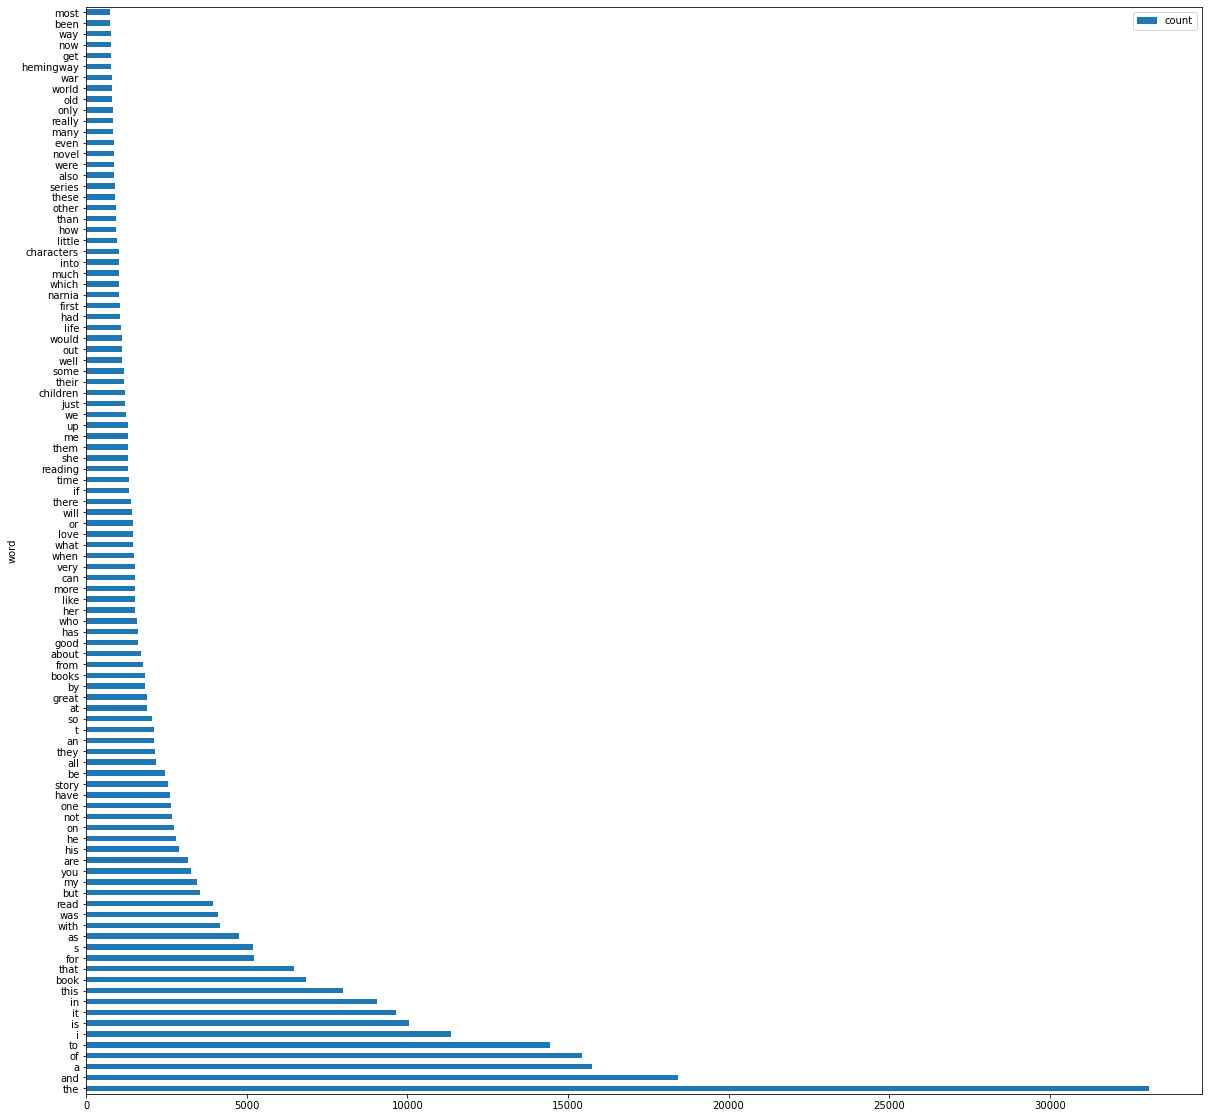

In [25]:
# Bar plot to show top 100 repeated words in positive label

top_100_positive.plot(kind='barh',x='word',y='count',figsize=(20, 20))

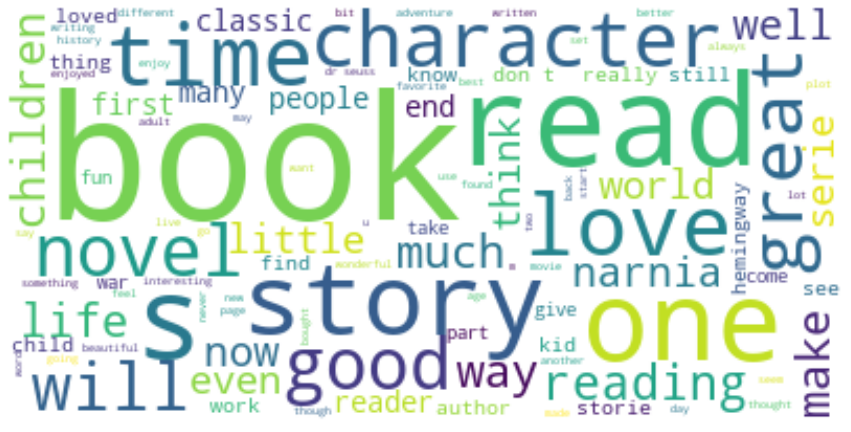

In [26]:
# Word Cloud to show top 100 repeated words in positive label with stopwords 

text = " ".join(i for i in final_positive_list)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Slicing for only negative reviews

df_negative = df[df['overall']=='negative']


# List of all words in all negative reviews after slicing

final_negative_list = []
for list in df_negative['TokenizedReview']:
    final_negative_list += list

In [28]:
# Dataframe containing most repeated 100 words in negative reviews without stopwords

top_100_negative = pd.value_counts(np.array(final_negative_list)).nlargest(100)
top_100_negative = top_100_negative.to_frame().reset_index()
top_100_negative = top_100_negative.rename({'index': 'word', 0: 'count'}, axis='columns')
top_100_negative

,word,count
0,the,28332
1,and,14454
2,to,13496
3,of,12993
4,i,12708
...,...,...
95,any,815
96,way,811
97,through,764
98,m,745


<AxesSubplot:ylabel='word'>

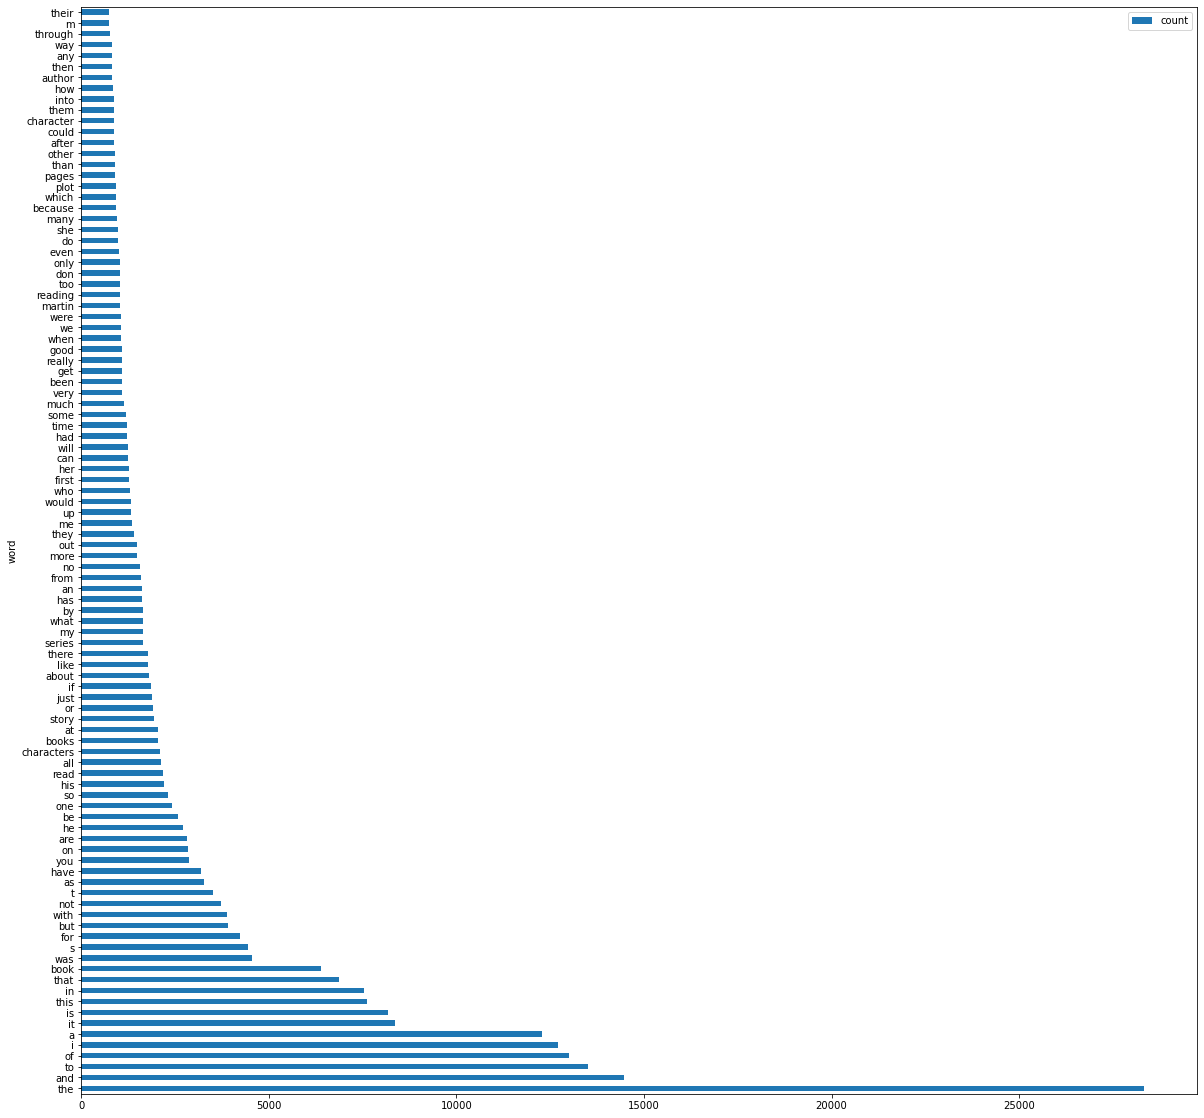

In [29]:
# Bar plot to show top 100 repeated words in negative label

top_100_negative.plot(kind='barh',x='word',y='count',figsize=(20, 20))

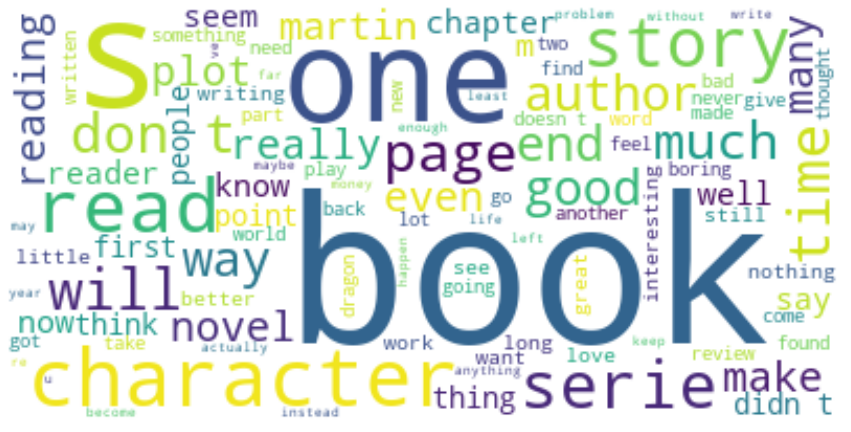

In [30]:
# Word Cloud to show top 100 repeated words in negative label with stopwords 

text = " ".join(i for i in final_negative_list)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Slicing for only neutral reviews

df_neutral = df[df['overall']=='neutral']

In [32]:
# List of all words in all neutral reviews after slicing

final_neutral_list = []
for list in df_neutral['TokenizedReview']:
    final_neutral_list += list

In [33]:
# Dataframe containing most repeated 100 words in neutral reviews without stopwords

top_100_neutral = pd.value_counts(np.array(final_neutral_list)).nlargest(100)
top_100_neutral = top_100_neutral.to_frame().reset_index()
top_100_neutral = top_100_neutral.rename({'index': 'word', 0: 'count'}, axis='columns')
top_100_neutral

,word,count
0,the,32751
1,and,15889
2,of,15183
3,to,14700
4,a,14316
...,...,...
95,little,804
96,do,801
97,did,799
98,also,793


<AxesSubplot:ylabel='word'>

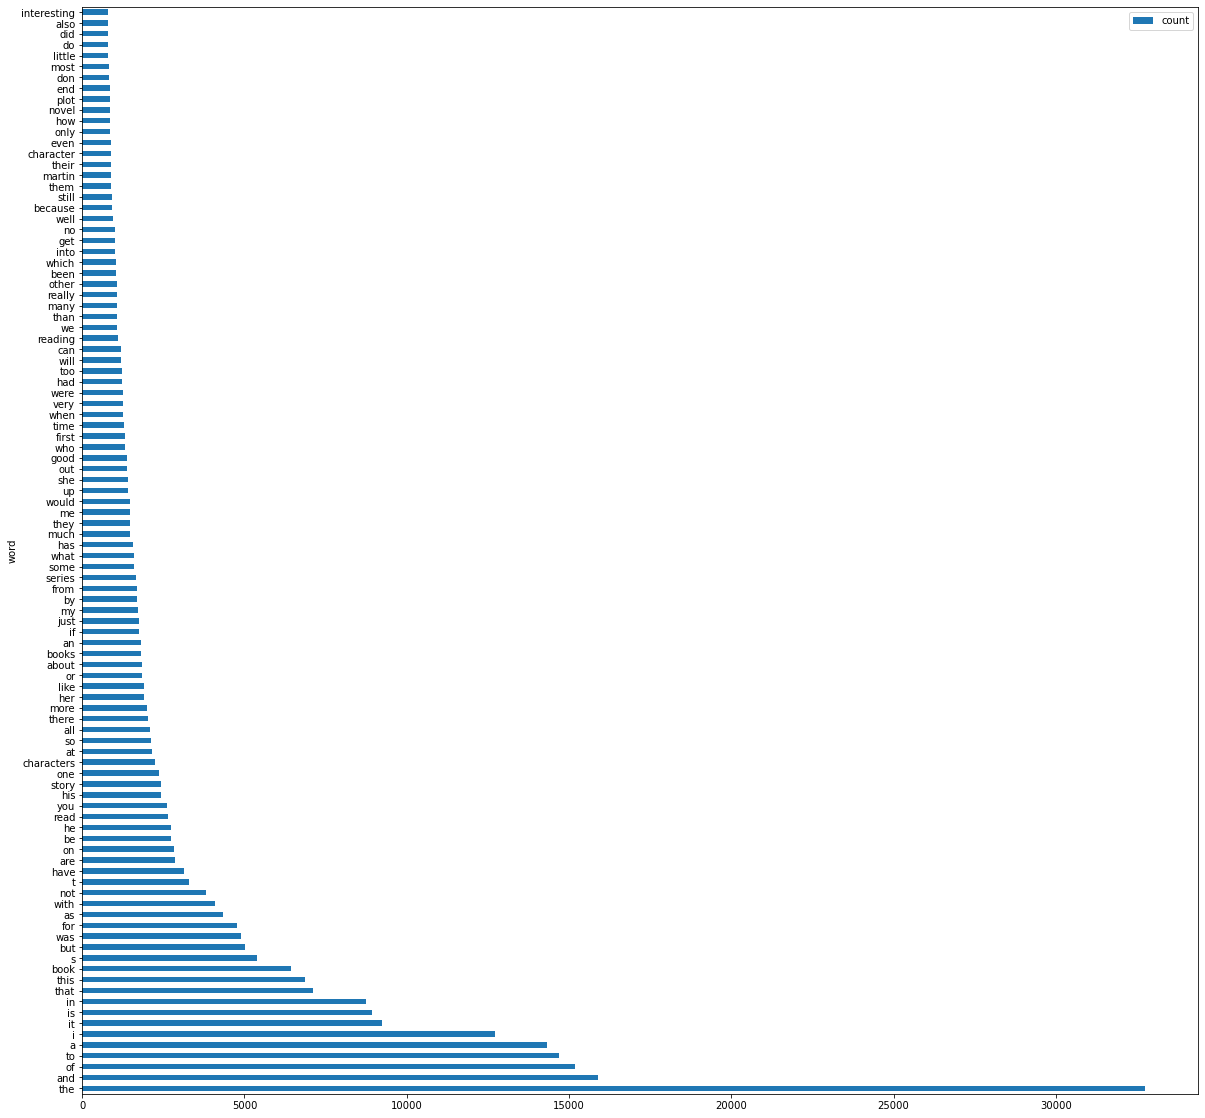

In [34]:
# Bar plot to show top 100 repeated words in neutral label

top_100_neutral.plot(kind='barh',x='word',y='count',figsize=(20, 20))

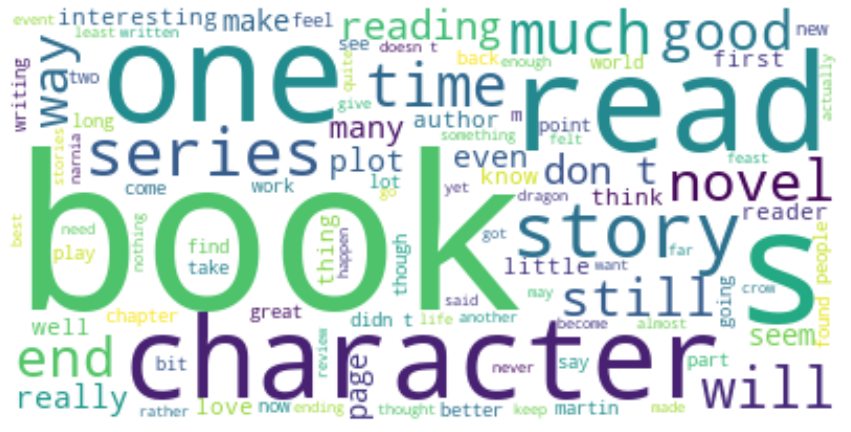

In [35]:
# Word Cloud to show top 100 repeated words in neutral label with stopwords 

text = " ".join(i for i in final_neutral_list)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As seen from the three bar graphs, we see that stopwords have the most occurence in the reviews. When 3 graphs for each label - negative, positive and neutral are compared side by side, we find that words like - the, of, a, an, to, I, this; interchangably  occupy the top positions. Majority of the word that made sense or the characters of the book, are either very lessly seen on the plot or are way below the top 100 positions.

#### Task 5: Remove stopwords
- Using a package of your choice (e.g., NLTK in Python) or your own code, remove stopwords from the TokenizedReview. 
    For example:
        o Input:
            - TokenizedReview: ['this', 'book', 'is', 'super', 'annoying', 'to', 'read', 'it', 's', 'so', 'repetitive']
        o Expected Output:
            - StopwordRemovedReview: ['book', 'super', 'annoying', 'read', 'repetitive']
        Note: You can create a new column in your dataset: StopwordRemovedReview.
- After removing stopwords from the text, create a plot that shows top 100 most frequency words for each label. Compare the top 100 words BEFORE and AFTER removing stopwords and discuss your findings.

In [36]:
# Using NLTK to remove stopwords from TokenizedReview
# Referrence - https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

df['StopwordRemovedReview'] = df['TokenizedReview'].apply(lambda x: ' '.join([word for word in x if word not in (sw_list)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nemo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
print("Review 1\n")
print("TokenizedReview:",df.loc[20]["TokenizedReview"])
print("\n")
print("StopwordRemovedReview:", df.loc[20]["StopwordRemovedReview"])
print("\n")

Review 1

TokenizedReview: ['among', 'the', 'various', 'detective', 'novelists', 'writing', 'today', 'tony', 'hillerman', 'occupies', 'a', 'pretty', 'unique', 'position', 'his', 'series', 'of', 'detective', 'novels', 'following', 'first', 'the', 'adventures', 'of', 'two', 'different', 'characters', 'lt', 'joe', 'leaphorn', 'and', 'sgt', 'jim', 'chee', 'in', 'separate', 'books', 'later', 'hillerman', 'combined', 'the', 'two', 'characters', 'and', 'has', 'been', 'chronicling', 'their', 'combined', 'adventures', 'for', 'a', 'good', 'long', 'time', 'now', 'he', 's', 'added', 'supporting', 'characters', 'including', 'a', 'series', 'of', 'girlfriends', 'for', 'chee', 'a', 'wife', 'who', 'died', 'and', 'then', 'a', 'lady', 'friend', 'for', 'leaphorn', 'and', 'colleagues', 'like', 'the', 'inimitable', 'cowboy', 'dashee', 'who', 's', 'appeared', 'in', 'the', 'background', 'of', 'several', 'of', 'the', 'books', 'this', 'latest', 'entry', 'in', 'the', 'series', 'isn', 't', 'the', 'strongest', 'bu

In [38]:
# Slicing for only positive reviews

df_positive_after_sw = df[df['overall']=='positive']

In [39]:
# List of all words in all positive reviews after slicing
# Reference - https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists

all_positive_comments = df_positive_after_sw.StopwordRemovedReview.to_list()
wordlist_all_positive_comments = []
for element in all_positive_comments:
    wordlist_all_positive_comments.append(element.split())
all_positive_words = []
for sublist in wordlist_all_positive_comments:
    for item in sublist:
        all_positive_words.append(item)

In [40]:
# Using Counter to count occurences in above list

from collections import Counter
counts = Counter(all_positive_words)
top_100_positive_words = counts.most_common(100)

In [41]:
# Dataframe containing most repeated 100 words in positive reviews with stopwords

dict1  = dict(top_100_positive_words)
df_100_positive_after_sw = pd.DataFrame.from_dict(dict1,orient = 'index')
df_100_positive_after_sw = df_100_positive_after_sw.reset_index()
df_100_positive_after_sw = df_100_positive_after_sw.rename({'index': 'word', 0: 'count'}, axis='columns')
df_100_positive_after_sw

,word,count
0,book,6856
1,read,3959
2,one,2647
3,story,2546
4,great,1890
...,...,...
95,made,350
96,beautiful,344
97,come,341
98,however,341


<AxesSubplot:ylabel='word'>

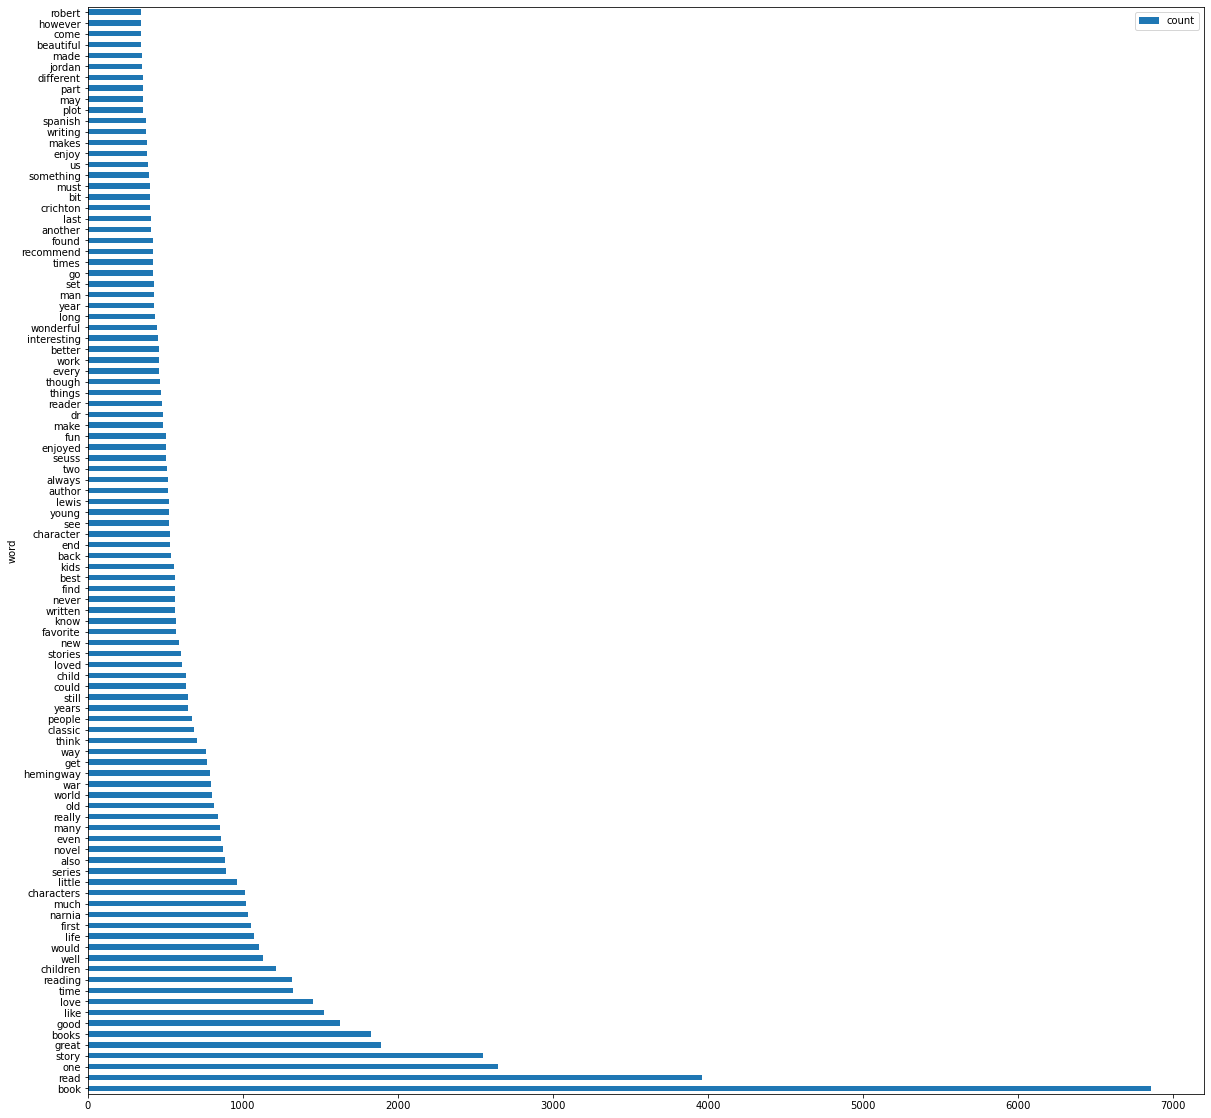

In [42]:
# Bar plot to show top 100 repeated words in positive label

df_100_positive_after_sw.plot(kind='barh',x='word',y='count',figsize=(20, 20))

In [43]:
# Slicing for only negative reviews

df_negative_after_sw = df[df['overall']=='negative']

In [44]:
# List of all words in all negative reviews after slicing

all_negative_comments = df_negative_after_sw.StopwordRemovedReview.to_list()
wordlist_all_negative_comments = []
for element in all_negative_comments:
    wordlist_all_negative_comments.append(element.split())
all_negative_words = []
for sublist in wordlist_all_negative_comments:
    for item in sublist:
        all_negative_words.append(item)

In [45]:
# Using Counter to count occurences in above list

counts = Counter(all_negative_words)
top_100_negative_words = counts.most_common(100)

In [46]:
# Dataframe containing most repeated 100 words in negative reviews with stopwords

dict2  = dict(top_100_negative_words)
df_100_negative_after_sw = pd.DataFrame.from_dict(dict2,orient = 'index')
df_100_negative_after_sw = df_100_negative_after_sw.reset_index()
df_100_negative_after_sw = df_100_negative_after_sw.rename({'index': 'word', 0: 'count'}, axis='columns')
df_100_negative_after_sw

,word,count
0,book,6402
1,one,2429
2,read,2189
3,characters,2089
4,books,2038
...,...,...
95,instead,328
96,least,326
97,however,325
98,thing,321


<AxesSubplot:ylabel='word'>

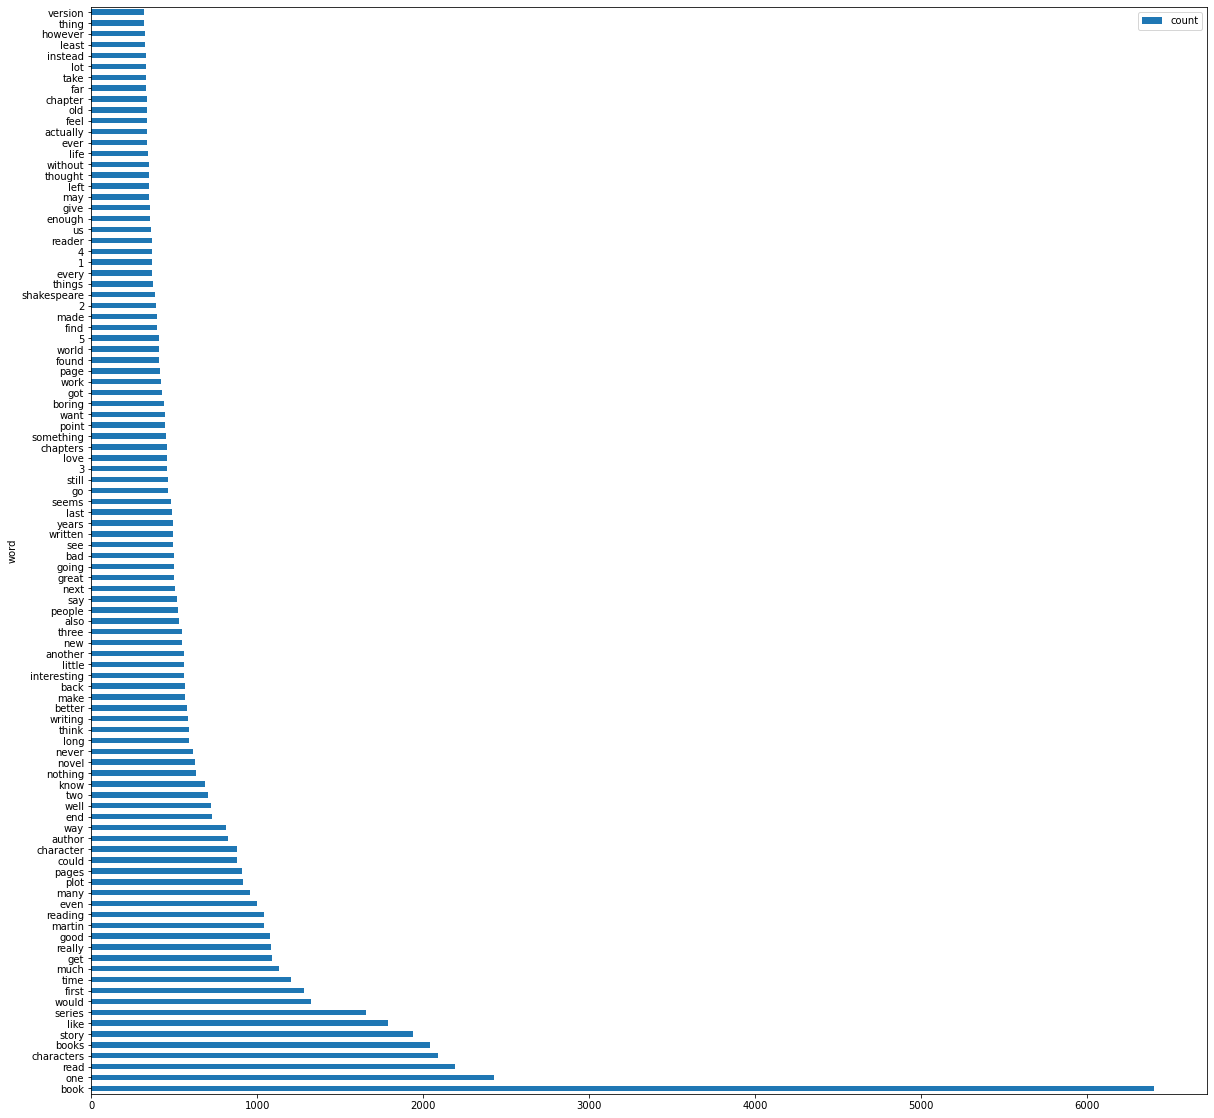

In [47]:
# Bar plot to show top 100 repeated words in negative label

df_100_negative_after_sw.plot(kind='barh',x='word',y='count',figsize=(20, 20))

In [48]:
# Slicing for only neutral reviews

df_neutral_after_sw = df[df['overall']=='neutral']

In [49]:
# List of all words in all neutral reviews after slicing

all_neutral_comments = df_neutral_after_sw.StopwordRemovedReview.to_list()
wordlist_all_neutral_comments = []
for element in all_neutral_comments:
    wordlist_all_neutral_comments.append(element.split())
all_neutral_words = []
for sublist in wordlist_all_neutral_comments:
    for item in sublist:
        all_neutral_words.append(item)

In [50]:
# Using Counter to count occurences in above list

counts = Counter(all_neutral_words)
top_100_neutral_words = counts.most_common(100)

In [51]:
# Dataframe containing most repeated 100 words in neutral reviews with stopwords

dict3  = dict(top_100_neutral_words)
df_100_neutral_after_sw = pd.DataFrame.from_dict(dict3,orient = 'index')
df_100_neutral_after_sw = df_100_neutral_after_sw.reset_index()
df_100_neutral_after_sw = df_100_neutral_after_sw.rename({'index': 'word', 0: 'count'}, axis='columns')
df_100_neutral_after_sw

,word,count
0,book,6443
1,read,2629
2,story,2427
3,one,2378
4,characters,2242
...,...,...
95,come,348
96,times,347
97,5,346
98,feast,346


<AxesSubplot:ylabel='word'>

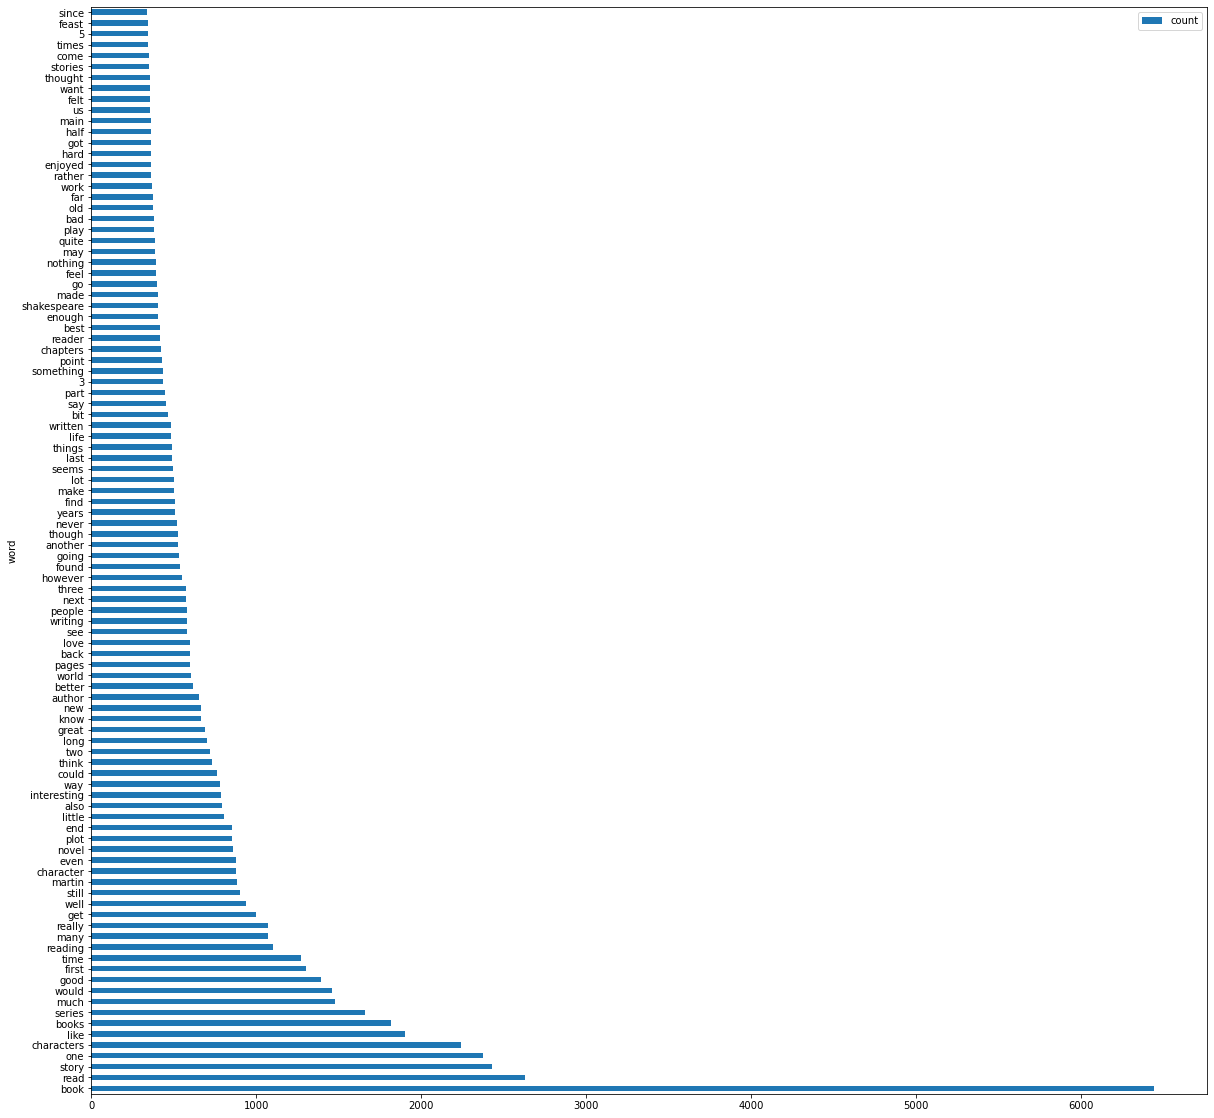

In [52]:
# Bar plot to show top 100 repeated words in neutral label

df_100_neutral_after_sw.plot(kind='barh',x='word',y='count',figsize=(20, 20))

If we compare the graphs, with and without stopwords we can see the words that are part of wordcloud are actually correct. As expected, stopwords are the most recurring words in any literature or review. When excluded, we are able to see the true meaning behind the reviews.

For instance, no matter the label - negative, positive or neutral; words like 'book','read','story', 'characters', 'series', and 'really' compromise majority of the review. They are repeated atleast 1000 times. When converted to probability, we can safely say they are present in 1 out of 15 reviews.

#### Task 6: Stemming
- Using a package of your choice (e.g., NLTK in Python), stem the TokenizedReview text (you can use Porter Stemmer). For example:
        o Input:
            - TokenizedReview: ['this', 'book', 'is', 'super', 'annoying', 'to', 'read', 'it', 's', 'so', 'repetitive']
        o Expected Output:
            - StemmedReview: ['thi', 'book', 'is', 'super', 'annoy', 'to', 'read', 'it', 's', 'so', 'repetit']
            - ProcessedReview: “thi book is super annoy to read it s so repetit”
        Note: you can create new columns in your dataset: StemmedReview and ProcessedReview.
- Report 3 examples before and after stemming. Discuss your findings. 

In [53]:
from nltk.stem import PorterStemmer 

# Defining a function for stemming
def stemmer(review):
    ps = PorterStemmer() 
    stem_review = [ps.stem(words) for words in review]
    return stem_review

df["StemmedReview"] = df.apply(lambda row : stemmer(row["TokenizedReview"]), axis = 1)

In [54]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,CleanedReview,TokenizedReview,StopwordRemovedReview,StemmedReview
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nthe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN,41 years later the cheese is government chee...,"[41, years, later, the, cheese, is, government...",41 years later cheese government cheese mice o...,"[41, year, later, the, chees, is, govern, chee..."
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,looking for a louis untermeyer book from the ...,Two Stars,1425168000,NaN,NaN,looking for a louis untermeyer book from the ...,"[looking, for, a, louis, untermeyer, book, fro...",looking louis untermeyer book 1980s one,"[look, for, a, loui, untermey, book, from, the..."
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,dr. seuss has some really brilliant books. th...,A below-average Dr. Seuss Book,1021680000,2,NaN,dr seuss has some really brilliant books th...,"[dr, seuss, has, some, really, brilliant, book...",dr seuss really brilliant books book dr seuss ...,"[dr, seuss, ha, some, realli, brilliant, book,..."
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,completly boring!!! yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN,completly boring yes it s a childerns book ...,"[completly, boring, yes, it, s, a, childerns, ...",completly boring yes childerns book able read ...,"[completli, bore, ye, it, s, a, childern, book..."
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,the carpet wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN,the carpet wars is a sampler of informal writi...,"[the, carpet, wars, is, a, sampler, of, inform...",carpet wars sampler informal writing australia...,"[the, carpet, war, is, a, sampler, of, inform,..."


In [55]:
# Defining a function to join stem words and form a processed review

def stem_joiner(words):
    processed_review = " ".join(words)
    return processed_review

df["ProcessedReview"] = df.apply(lambda row : stem_joiner(row["StemmedReview"]), axis = 1)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,CleanedReview,TokenizedReview,StopwordRemovedReview,StemmedReview,ProcessedReview
0,neutral,False,"09 18, 2006",A294QSAEH1Z7YI,0001713353,{'Format:': ' Hardcover'},BHGobuchul,41 years later:\n\nthe cheese is government ch...,"Outdated, but a good 1960s primer",1158537600,NaN,NaN,41 years later the cheese is government chee...,"[41, years, later, the, cheese, is, government...",41 years later cheese government cheese mice o...,"[41, year, later, the, chees, is, govern, chee...",41 year later the chees is govern chees the mi...
1,negative,True,"03 1, 2015",A3ZG0U3FOF3T1,0001061240,{'Format:': ' Hardcover'},P. Howell,looking for a louis untermeyer book from the ...,Two Stars,1425168000,NaN,NaN,looking for a louis untermeyer book from the ...,"[looking, for, a, louis, untermeyer, book, fro...",looking louis untermeyer book 1980s one,"[look, for, a, loui, untermey, book, from, the...",look for a loui untermey book from the 1980 an...
2,neutral,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,dr. seuss has some really brilliant books. th...,A below-average Dr. Seuss Book,1021680000,2,NaN,dr seuss has some really brilliant books th...,"[dr, seuss, has, some, really, brilliant, book...",dr seuss really brilliant books book dr seuss ...,"[dr, seuss, ha, some, realli, brilliant, book,...",dr seuss ha some realli brilliant book thi boo...
3,negative,True,"02 20, 2016",A2M08SO0PJKPAV,0001712799,{'Format:': ' Hardcover'},Emily,completly boring!!! yes it's a childerns book ...,Don't waste your money,1455926400,NaN,NaN,completly boring yes it s a childerns book ...,"[completly, boring, yes, it, s, a, childerns, ...",completly boring yes childerns book able read ...,"[completli, bore, ye, it, s, a, childern, book...",completli bore ye it s a childern book that th...
4,neutral,False,"07 8, 2004",A1JS302JFHH9DJ,0002006448,{'Format:': ' Hardcover'},Daniel H. Bigelow,the carpet wars is a sampler of informal writi...,Painless Education,1089244800,9,NaN,the carpet wars is a sampler of informal writi...,"[the, carpet, wars, is, a, sampler, of, inform...",carpet wars sampler informal writing australia...,"[the, carpet, war, is, a, sampler, of, inform,...",the carpet war is a sampler of inform write fr...


In [56]:
print("----Review 1----\n")
print("TokenizedReview:",df.loc[0]["TokenizedReview"])
print("\n")
print("StemmedReview:", df.loc[0]["StemmedReview"])
print("\n")
print("ProcessedReview:", df.loc[0]["ProcessedReview"])
print("\n")

print("----Review 2----\n")
print("TokenizedReview:",df.loc[4]["TokenizedReview"])
print("\n")
print("StemmedReview:", df.loc[4]["StemmedReview"])
print("\n")
print("ProcessedReview:", df.loc[4]["ProcessedReview"])
print("\n")

print("----Review 3----\n")
print("TokenizedReview:",df.loc[789]["TokenizedReview"])
print("\n")
print("StemmedReview:", df.loc[789]["StemmedReview"])
print("\n")
print("ProcessedReview:", df.loc[789]["ProcessedReview"])
print("\n")

----Review 1----

TokenizedReview: ['41', 'years', 'later', 'the', 'cheese', 'is', 'government', 'cheese', 'the', 'mice', 'objected', 'to', 'the', 'king', 's', 'idea', 'of', 'good', 'manners', 'as', 'species', 'centric', 'and', 'rebelled', 'the', 'king', 'blamed', 'the', 'peasants', 'and', 'forbade', 'them', 'to', 'keep', 'cats', 'or', 'chase', 'mice', 'from', 'their', 'homes', 'this', 'made', 'things', 'worse', 'peasants', 'that', 'could', 'afford', 'to', 'do', 'so', 'moved', 'as', 'far', 'away', 'from', 'mice', 'as', 'possible', 'i', 'can', 't', 'wait', 'for', 'the', 'next', 'chapter']


StemmedReview: ['41', 'year', 'later', 'the', 'chees', 'is', 'govern', 'chees', 'the', 'mice', 'object', 'to', 'the', 'king', 's', 'idea', 'of', 'good', 'manner', 'as', 'speci', 'centric', 'and', 'rebel', 'the', 'king', 'blame', 'the', 'peasant', 'and', 'forbad', 'them', 'to', 'keep', 'cat', 'or', 'chase', 'mice', 'from', 'their', 'home', 'thi', 'made', 'thing', 'wors', 'peasant', 'that', 'could', 'a

As we can see, after the words were stemmed down and combined again to form a sentence, original review has lost its meaning. Numbers as strings don't change significantly but words like writing change to write and change the context of sentence. It becomes to deduce what the reviewer is saying. There are also some stem words that are not part of normal english language. For e.g. - onli as itself doesn't mean anything.

We can also notice that some words don't stem to their root. Like magician in example 3 should have been stemmed to magic.

#### Task 7:  Creating n-grams
- Using a package of your choice (e.g., NLTK in Python) or your own code, extract bigrams from the dataset. Create a new column BiGrams. For Example:
        o Input:
            - OriginalReview: “this book is super annoying to read. it's so repetitive.”
        o Output:
            - Bigrams: [('this', 'book'), ('book', 'is'), ('is', 'super'), ('super', 'annoying'), ('annoying', 'to'), ('to', 'read.'), ('read.', "it's"), ("it's", 'so'), ('so', 'repetitive.')]
- Report the top 10 frequently occurring bigrams from the first 100 instances of the training set

In [57]:
from nltk.util import ngrams


def ngrammar(review,n = 2):
    bigrams_list = []
    bigrams_from_reviews = ngrams(review.split(), n)
    for item in bigrams_from_reviews:
        bigrams_list.append(item)
    return bigrams_list
        

df["Bigrams"] = df.apply(lambda row : ngrammar(row["reviewText"]), axis = 1)

In [58]:
df_train = df_train[pd.notnull(df_train['reviewText'])]
df_train = df_train.reset_index(drop=True)

In [59]:
df_train["Bigrams"] = df_train.apply(lambda row : ngrammar(row["reviewText"]), axis = 1)

In [60]:
bigram_list = []
for tuples in df_train['Bigrams'].head(100).to_list():
    for bigram in tuples:
        bigram_list.append(bigram)
# bigram_list

In [61]:
counts = Counter(bigram_list)
top_10_bigrams = counts.most_common(10)
top_10_bigrams

[(('of', 'the'), 81),
 (('in', 'the'), 48),
 (('to', 'the'), 35),
 (('is', 'a'), 30),
 (('to', 'be'), 24),
 (('on', 'the'), 23),
 (('for', 'a'), 20),
 (('and', 'the'), 20),
 (('in', 'a'), 20),
 (('I', 'have'), 20)]